<a href="https://colab.research.google.com/github/BVika/Machine_learning_methods/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_5(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ практика 5. Задача регрессии

## **Цель занятия:**
Изучить задачу регрессии, познакомиться с метриками качества, реализовать модель для решения задачи с использованием разных моделей.

## **Задание состоит из следующих частей:**
1. Понимание значимости отбора признаков
2. Обучение регрессии
3. Метирки качества для регресии (только самые важные)
4. Регулязризация

## Задачи для домашки ⏰

1. Выбрать y = непрерывная переменая
2. Разделить на обучающую, тестовую и валидационную выборки
3. Выбрать лучшие признаки для X и выбрать лучший результат
4. Объяснить результаты метрик качества MAE, MSE, R2

**Для 👽**
5. Попробовать модель ```KNeighborsRegressor```, объяснить как работает модель, объяснить результат
6. Попробовать модель ```DecisionTreeRegressor```, объяснить как работает модель, объяснить результат

In [ ]:
! pip install pandas scikit-learn seaborn scipy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
try:
    df = pd.read_csv('/content/heart.csv')
except FileNotFoundError:
    df = pd.read_csv('heart.csv')
df['SBP_50'] = df['SBP_50'].astype('float')

df['DEATH'] = df['DEATH'].astype('object')
df['SES'] = df['SES'].astype('category')
df['CL_STATUS'] = df['CL_STATUS'].astype('category')
df['IHD_DX'] = df['IHD_DX'].astype('category')
df['MD_50'] = df['MD_50'].astype('category')
df['MD_62'] = df['MD_62'].astype('category')


df['WT_50'] = df['WT_50'].astype('float')
df['SBP_62'] = df['SBP_62'].astype('float')
df['DBP_62'] = df['DBP_62'].astype('float')
df['DBP_50'] = df['DBP_50'].astype('float')
df['CHOL_62'] = df['CHOL_62'].astype('float')
df['CHOL_50'] = df['CHOL_50'].astype('float')
df['WT_62'] = df['WT_62'].astype('float')
df['HT_50'] = df['HT_50'].astype('float')
y = df['DBP_50'] # выбираем целевую переменную (количественная)
X = df.drop('DBP_50', axis=1) # переменные для проверки влияния

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   AGE_50     200 non-null    int64   
 1   MD_50      200 non-null    category
 2   SBP_50     200 non-null    float64 
 3   DBP_50     200 non-null    float64 
 4   HT_50      200 non-null    float64 
 5   WT_50      200 non-null    float64 
 6   CHOL_50    200 non-null    float64 
 7   SES        200 non-null    category
 8   CL_STATUS  200 non-null    category
 9   MD_62      200 non-null    category
 10  SBP_62     200 non-null    float64 
 11  DBP_62     200 non-null    float64 
 12  CHOL_62    200 non-null    float64 
 13  WT_62      200 non-null    float64 
 14  IHD_DX     200 non-null    category
 15  DEATH      200 non-null    object  
dtypes: category(5), float64(9), int64(1), object(1)
memory usage: 19.6+ KB


In [ ]:
df

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,42,1,110.0,65.0,64.0,147.0,291.0,2,8,4,120.0,78.0,271.0,146.0,2,1
1,53,1,130.0,72.0,69.0,167.0,278.0,1,6,2,122.0,68.0,250.0,165.0,9,1
2,53,2,120.0,90.0,70.0,222.0,342.0,4,8,1,132.0,90.0,304.0,223.0,2,1
3,48,4,120.0,80.0,72.0,229.0,239.0,4,8,2,118.0,68.0,209.0,227.0,3,1
4,53,3,118.0,74.0,66.0,134.0,243.0,3,8,5,118.0,56.0,261.0,138.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115.0,80.0,66.0,148.0,300.0,2,8,1,115.0,65.0,273.0,152.0,0,0
196,23,1,110.0,70.0,69.0,137.0,120.0,3,8,2,112.0,76.0,198.0,153.0,0,0
197,20,3,130.0,80.0,66.0,150.0,210.0,5,0,1,130.0,85.0,274.0,158.0,0,0
198,46,3,140.0,84.0,66.0,138.0,130.0,4,6,2,148.0,88.0,160.0,157.0,0,0


In [ ]:
X

,AGE_50,MD_50,SBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,42,1,110.0,64.0,147.0,291.0,2,8,4,120.0,78.0,271.0,146.0,2,1
1,53,1,130.0,69.0,167.0,278.0,1,6,2,122.0,68.0,250.0,165.0,9,1
2,53,2,120.0,70.0,222.0,342.0,4,8,1,132.0,90.0,304.0,223.0,2,1
3,48,4,120.0,72.0,229.0,239.0,4,8,2,118.0,68.0,209.0,227.0,3,1
4,53,3,118.0,66.0,134.0,243.0,3,8,5,118.0,56.0,261.0,138.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115.0,66.0,148.0,300.0,2,8,1,115.0,65.0,273.0,152.0,0,0
196,23,1,110.0,69.0,137.0,120.0,3,8,2,112.0,76.0,198.0,153.0,0,0
197,20,3,130.0,66.0,150.0,210.0,5,0,1,130.0,85.0,274.0,158.0,0,0
198,46,3,140.0,66.0,138.0,130.0,4,6,2,148.0,88.0,160.0,157.0,0,0


Преобразование категориальных переменных остается без изменений

In [ ]:
# Создаем копию данных

category_columns: list[str] = X.select_dtypes(include=['object']).columns # собираем колонки помеченные как object

# Применяем One-Hot Encoding к категориальным столбцам, исключая первую категорию (drop_first=True)
X = pd.get_dummies(X, columns=category_columns,drop_first=True)


In [ ]:
X

,AGE_50,MD_50,SBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH_1
0,42,1,110.0,64.0,147.0,291.0,2,8,4,120.0,78.0,271.0,146.0,2,True
1,53,1,130.0,69.0,167.0,278.0,1,6,2,122.0,68.0,250.0,165.0,9,True
2,53,2,120.0,70.0,222.0,342.0,4,8,1,132.0,90.0,304.0,223.0,2,True
3,48,4,120.0,72.0,229.0,239.0,4,8,2,118.0,68.0,209.0,227.0,3,True
4,53,3,118.0,66.0,134.0,243.0,3,8,5,118.0,56.0,261.0,138.0,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115.0,66.0,148.0,300.0,2,8,1,115.0,65.0,273.0,152.0,0,False
196,23,1,110.0,69.0,137.0,120.0,3,8,2,112.0,76.0,198.0,153.0,0,False
197,20,3,130.0,66.0,150.0,210.0,5,0,1,130.0,85.0,274.0,158.0,0,False
198,46,3,140.0,66.0,138.0,130.0,4,6,2,148.0,88.0,160.0,157.0,0,False


In [ ]:
df_corr_test = X.copy() #создает копию объекта X и сохраняет его в переменной df_corr_test

# Добавляем целевую переменную в копию данных
df_corr_test['y'] = y
df_corr_test

,AGE_50,MD_50,SBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH_1,y
0,42,1,110.0,64.0,147.0,291.0,2,8,4,120.0,78.0,271.0,146.0,2,True,65.0
1,53,1,130.0,69.0,167.0,278.0,1,6,2,122.0,68.0,250.0,165.0,9,True,72.0
2,53,2,120.0,70.0,222.0,342.0,4,8,1,132.0,90.0,304.0,223.0,2,True,90.0
3,48,4,120.0,72.0,229.0,239.0,4,8,2,118.0,68.0,209.0,227.0,3,True,80.0
4,53,3,118.0,66.0,134.0,243.0,3,8,5,118.0,56.0,261.0,138.0,2,True,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115.0,66.0,148.0,300.0,2,8,1,115.0,65.0,273.0,152.0,0,False,80.0
196,23,1,110.0,69.0,137.0,120.0,3,8,2,112.0,76.0,198.0,153.0,0,False,70.0
197,20,3,130.0,66.0,150.0,210.0,5,0,1,130.0,85.0,274.0,158.0,0,False,80.0
198,46,3,140.0,66.0,138.0,130.0,4,6,2,148.0,88.0,160.0,157.0,0,False,84.0


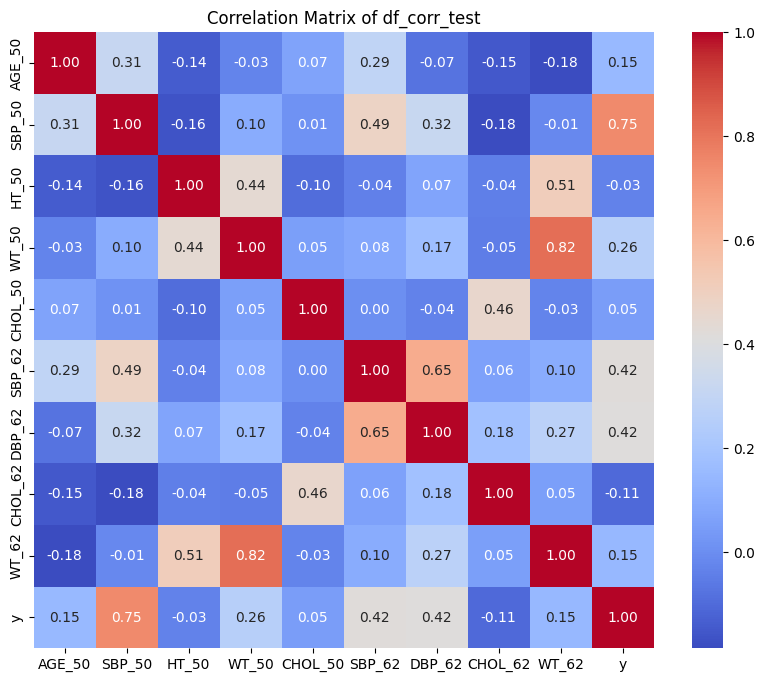

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что у вас уже есть DataFrame под названием df_corr_test
# Выводим матрицу корреляции (только для числовых столбцов)
correlation_matrix = df_corr_test.select_dtypes(['int', 'float']).corr()
#df_corr_test.select_dtypes(['int', 'float']) выбирает только те столбцы из DataFrame df_corr_test, которые имеют типы данных int (целые числа) и float (числа с плавающей точкой).
#.corr() вычисляет матрицу корреляции для выбранных числовых столбцов. Результат сохраняется в переменной correlation_matrix.

# Отображаем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8)) # Создает новую фигуру для графика с заданными размерами (ширина 10  и высота 8 ).
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')#  создает тепловую карту на основе матрицы корреляции.
plt.title("Correlation Matrix of df_corr_test")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

def resolve_regression(X, y, regularization=None):
    """
    Выполняет регрессию с учетом регуляризации.

    Parameters:
    - X: Входные данные (признаки).
    - y: Целевые значения.
    - regularization: Тип регуляризации ('l1', 'l2', None). Если None, используется обычная линейная регрессия.
    """
    # Разделение данных на обучающую и тестовую выборки (80% / 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Нормализуем числовые признаки
    #numeric_features = X_train.select_dtypes(include=['float64', 'int']).columns.tolist()
    #scaler = MinMaxScaler()
    #X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
    #X_test[numeric_features] = scaler.transform(X_test[numeric_features])

    # Инициализация модели в зависимости от типа регуляризации
    if regularization == 'l1':
        model = Lasso() # L1-регуляризация (Lasso)
    elif regularization == 'l2':
        model = Ridge() # L2-регуляризация (Ridge)
    else:
        model = LinearRegression() # Линейная регрессия без регуляризации

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрик качества
    mae = mean_absolute_error(y_test, y_pred) # Средняя абсолютная ошибка
    mse = mean_squared_error(y_test, y_pred)  # Средняя квадратичная ошибка
    r2 = r2_score(y_test, y_pred)             # Коэффициент детерминации (R^2)

    # Вывод результатов
    print(f"Regularization: {regularization}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    return model, X_train, X_test, y_train, y_test

In [ ]:
resolve_regression(X, y)
None # Используем None (оператор ничего не делает) чтобы убрать вывод от return у функции resolve_regression. Пока он нам не нужен и и будет мешать


Regularization: None
Mean Absolute Error (MAE): 4.34
Mean Squared Error (MSE): 25.77
R^2 Score: 0.58


In [ ]:
resolve_regression(X[['DBP_62', 'SBP_62', 'SBP_50', 'WT_50']], y)
None


Regularization: None
Mean Absolute Error (MAE): 4.01
Mean Squared Error (MSE): 23.15
R^2 Score: 0.62


MAE уменьшелось на 0.20. Это говорит о том, что в среднем предсказания модели стали более точными, так как ошибка между предсказанными и фактическими значениями уменьшились.

MSE первой модели составляет 25.77, в то время как у второй модели — 23.15. Это также указывает на то, что вторая модель имеет меньшее среднее квадратичное отклонение ошибок, что свидетельствует о лучшей точности.

R^2 Score первой модели равен 0.58, а второй модели — 0.62. Более высокое значение R^2 (0.62) указывает на то, что вторая модель лучше объясняет вариацию зависимой переменной.

Это может быть связано с тем, что вторая модель использует более подходящие признаки или имеет лучшую структуру, что позволяет ей более точно предсказывать значения.



Теперь попробуем оптимизировать числовые переменные и сделать тоже самое

In [ ]:
X

,AGE_50,MD_50,SBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH_1
0,42,1,110.0,64.0,147.0,291.0,2,8,4,120.0,78.0,271.0,146.0,2,True
1,53,1,130.0,69.0,167.0,278.0,1,6,2,122.0,68.0,250.0,165.0,9,True
2,53,2,120.0,70.0,222.0,342.0,4,8,1,132.0,90.0,304.0,223.0,2,True
3,48,4,120.0,72.0,229.0,239.0,4,8,2,118.0,68.0,209.0,227.0,3,True
4,53,3,118.0,66.0,134.0,243.0,3,8,5,118.0,56.0,261.0,138.0,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115.0,66.0,148.0,300.0,2,8,1,115.0,65.0,273.0,152.0,0,False
196,23,1,110.0,69.0,137.0,120.0,3,8,2,112.0,76.0,198.0,153.0,0,False
197,20,3,130.0,66.0,150.0,210.0,5,0,1,130.0,85.0,274.0,158.0,0,False
198,46,3,140.0,66.0,138.0,130.0,4,6,2,148.0,88.0,160.0,157.0,0,False


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   AGE_50     200 non-null    int64   
 1   MD_50      200 non-null    category
 2   SBP_50     200 non-null    float64 
 3   HT_50      200 non-null    float64 
 4   WT_50      200 non-null    float64 
 5   CHOL_50    200 non-null    float64 
 6   SES        200 non-null    category
 7   CL_STATUS  200 non-null    category
 8   MD_62      200 non-null    category
 9   SBP_62     200 non-null    float64 
 10  DBP_62     200 non-null    float64 
 11  CHOL_62    200 non-null    float64 
 12  WT_62      200 non-null    float64 
 13  IHD_DX     200 non-null    category
 14  DEATH_1    200 non-null    bool    
dtypes: bool(1), category(5), float64(8), int64(1)
memory usage: 16.7 KB


Отбор признаков по корреляции

In [ ]:
import pandas as pd
import numpy as np

def select_features_correlation(X, y, max_features=5):
    # Вычисляем корреляцию признаков с целевой переменной
    correlation = X.apply(lambda col: np.abs(col.corr(y)))

    # Отбираем top-N признаков с наибольшей корреляцией
    top_features = correlation.nlargest(max_features).index

    # Возвращаем X и y с отобранными признаками
    return X[top_features], y


Отбор признаков с помощью RFE (Recursive Feature Elimination)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def select_features_rfe(X, y, max_features=5):
    # Инициализация модели линейной регрессии
    model = LinearRegression()

    # RFE с указанным количеством признаков
    selector = RFE(model, n_features_to_select=max_features)
    selector = selector.fit(X, y)

    # Отбор признаков
    selected_features = X.columns[selector.support_]

    # Возвращаем X и y с отобранными признаками
    return X[selected_features], y


In [ ]:
# Предположим, что у вас есть данные X и y
# Используем отбор на основе корреляции
X_selected_corr, y_selected_corr = select_features_correlation(X, y, max_features=5)

# Используем отбор с помощью RFE
X_selected_rfe, y_selected_rfe = select_features_rfe(X, y, max_features=5)


In [ ]:
resolve_regression(X_selected_corr, y_selected_corr)
None

Regularization: None
Mean Absolute Error (MAE): 3.95
Mean Squared Error (MSE): 21.91
R^2 Score: 0.64


In [ ]:
resolve_regression(X_selected_rfe, y_selected_rfe)
None

Regularization: None
Mean Absolute Error (MAE): 4.40
Mean Squared Error (MSE): 30.09
R^2 Score: 0.51


Regularization: None
Mean Absolute Error (MAE): 4.40
Mean Squared Error (MSE): 30.09
R^2 Score: 0.51


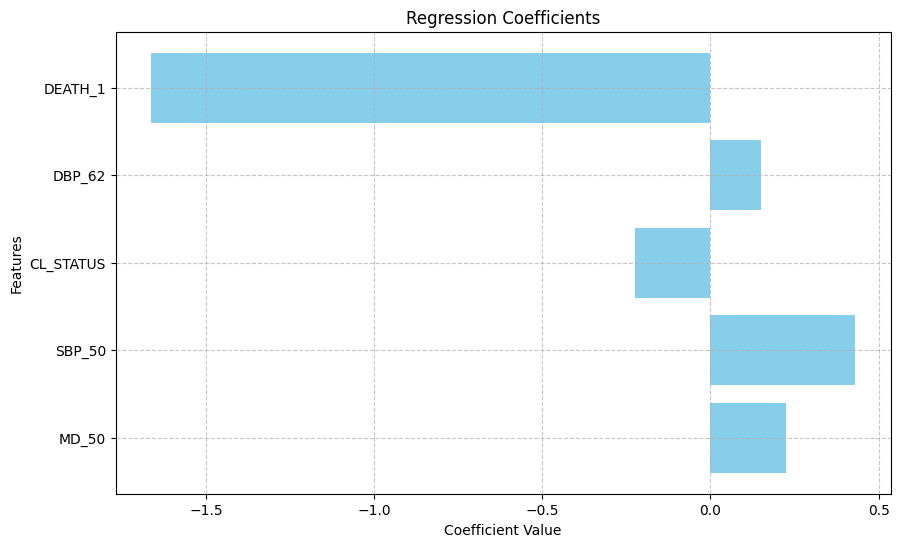

In [ ]:
import matplotlib.pyplot as plt

def plot_regression_coefficients(model, feature_names):
    # Извлекаем коэффициенты регрессии
    coefficients = model.coef_

    # Создаем столбчатую диаграмму для визуализации коэффициентов
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, coefficients, color='skyblue')
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.title("Regression Coefficients")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Пример использования:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe, None)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)



На графике отображены коэффициенты линейной регрессии для различных признаков. Коэффициенты показывают вклад каждого признака в модель. Наибольшее влияние на модель оказывают признаки SBP_50 и DBP_62.

Метрики модели:

MAE (Средняя абсолютная ошибка): 4.40 — средняя разница между предсказанными и фактическими значениями.

MSE (Среднеквадратичная ошибка): 30.09 — средняя квадратичная ошибка, чувствительна к большим ошибкам.

R² (Коэффициент детерминации): 0.51 — модель объясняет 51% дисперсии данных, что указывает на высокую точность.
Дисперсия — это мера разброса значений целевой переменной. Она показывает, насколько данные отклоняются от среднего.

Коэффициент детерминации 𝑅2 = 0.51 означает, что модель объясняет 51% вариации данных. Это значит, что 51% разброса в значениях целевой переменной модель смогла предсказать, а 49% остаются необъясненными (шум или неизвестные факторы).

In [ ]:
X_selected_rfe

,MD_50,SBP_50,CL_STATUS,DBP_62,DEATH_1
0,1,110.0,8,78.0,True
1,1,130.0,6,68.0,True
2,2,120.0,8,90.0,True
3,4,120.0,8,68.0,True
4,3,118.0,8,56.0,True
...,...,...,...,...,...
195,1,115.0,8,65.0,False
196,1,110.0,8,76.0,False
197,3,130.0,0,85.0,False
198,3,140.0,6,88.0,False


In [ ]:


# Выбираем числовые признаки
numeric_features = X_selected_rfe.select_dtypes(include=['float64']).columns.tolist()
# ВНИМАНИЕ: тут отбираются только float, если у вас не категориальные признаки имеют тип int - нужно исправить (например, в ручную указать нужные столбцы)

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_selected_rfe.loc[:,numeric_features] = scaler.fit_transform(X_selected_rfe[numeric_features])


In [ ]:
X_selected_rfe

,MD_50,SBP_50,CL_STATUS,DBP_62,DEATH_1
0,1,110.0,8,78.0,True
1,1,130.0,6,68.0,True
2,2,120.0,8,90.0,True
3,4,120.0,8,68.0,True
4,3,118.0,8,56.0,True
...,...,...,...,...,...
195,1,115.0,8,65.0,False
196,1,110.0,8,76.0,False
197,3,130.0,0,85.0,False
198,3,140.0,6,88.0,False


In [ ]:
 y_selected_rfe

,DBP_50
0,65.0
1,72.0
2,90.0
3,80.0
4,74.0
...,...
195,80.0
196,70.0
197,80.0
198,84.0


Regularization: None
Mean Absolute Error (MAE): 4.40
Mean Squared Error (MSE): 30.09
R^2 Score: 0.51


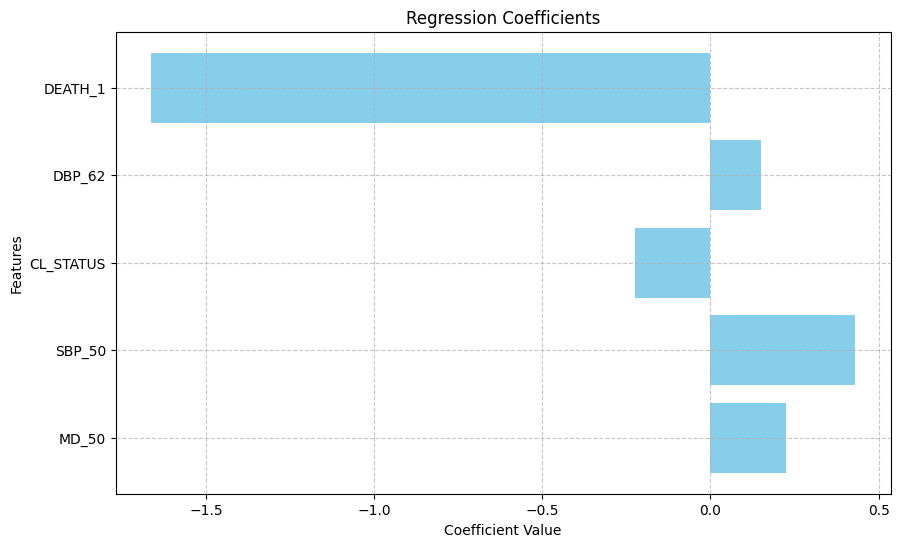

In [ ]:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)


## Пару слов про метрики

In [ ]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик качества
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error (MAE): 4.40
Mean Squared Error (MSE): 30.09
R^2 Score: 0.51


Про метрики качества в регресии - https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii#regressiya

## Регуляризация

In [ ]:
X

,AGE_50,MD_50,SBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH_1
0,42,1,110.0,64.0,147.0,291.0,2,8,4,120.0,78.0,271.0,146.0,2,True
1,53,1,130.0,69.0,167.0,278.0,1,6,2,122.0,68.0,250.0,165.0,9,True
2,53,2,120.0,70.0,222.0,342.0,4,8,1,132.0,90.0,304.0,223.0,2,True
3,48,4,120.0,72.0,229.0,239.0,4,8,2,118.0,68.0,209.0,227.0,3,True
4,53,3,118.0,66.0,134.0,243.0,3,8,5,118.0,56.0,261.0,138.0,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115.0,66.0,148.0,300.0,2,8,1,115.0,65.0,273.0,152.0,0,False
196,23,1,110.0,69.0,137.0,120.0,3,8,2,112.0,76.0,198.0,153.0,0,False
197,20,3,130.0,66.0,150.0,210.0,5,0,1,130.0,85.0,274.0,158.0,0,False
198,46,3,140.0,66.0,138.0,130.0,4,6,2,148.0,88.0,160.0,157.0,0,False


Про регуляризацию - https://yandex.ru/q/datascience/10672717313/

1. **L1-регуляризация (Lasso)**:
   Формула для L1-регуляризации добавляет штраф, который равен сумме абсолютных значений весов модели. Это может привести к обнулению некоторых весов, то есть к выбору только наиболее значимых признаков.

   Формула для L1-регуляризации:
   J(θ) = Функция потерь + λ * Σ|θ_i|

   где:
   - J(θ) — общая функция потерь с регуляризацией,
   - Функция потерь — это функция, измеряющая ошибку модели (например, среднеквадратическая ошибка),
   - λ — коэффициент регуляризации, который контролирует степень штрафа,
   - Σ|θ_i| — сумма абсолютных значений всех весов модели (θ_i).

2. **L2-регуляризация (Ridge)**:
   Формула для L2-регуляризации добавляет штраф, который равен сумме квадратов весов модели. Это не обнуляет веса, но снижает их величину, что приводит к более простым и менее подверженным переобучению моделям.

   Формула для L2-регуляризации:
   J(θ) = Функция потерь + λ * Σθ_i^2

   где:
   - J(θ) — общая функция потерь с регуляризацией,
   - Σθ_i^2 — сумма квадратов всех весов модели (θ_i).

3. **Elastic Net**:
   Это комбинированный метод, который использует и L1-штраф, и L2-штраф. Он полезен, когда нужно балансировать преимущества обоих методов.

   Формула для Elastic Net:
   J(θ) = Функция потерь + λ_1 * Σ|θ_i| + λ_2 * Σθ_i^2

   где:
   - λ_1 и λ_2 — коэффициенты регуляризации для L1 и L2 частей соответственно.

Регуляризация помогает улучшить обобщающую способность модели и предотвращает её переобучение.

Regularization: l1
Mean Absolute Error (MAE): 4.52
Mean Squared Error (MSE): 27.88
R^2 Score: 0.54


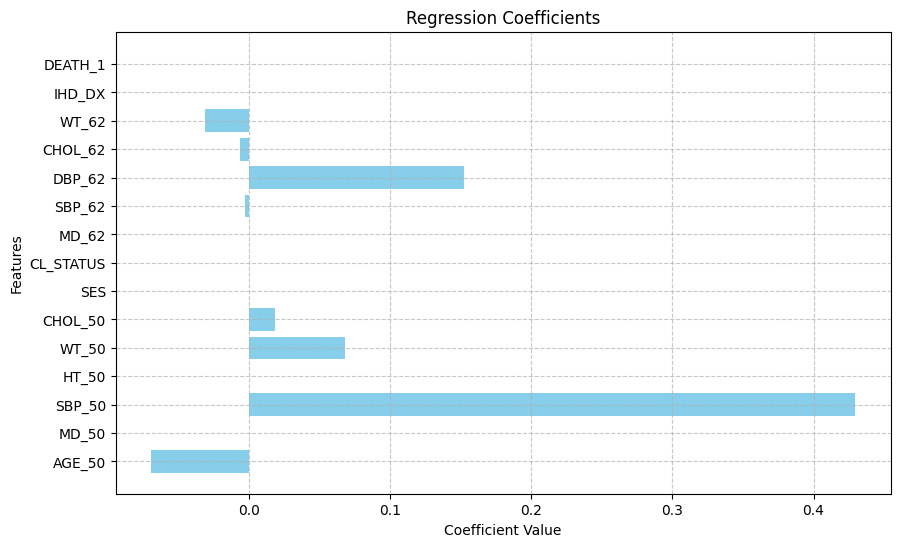

In [ ]:
# L1-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l1')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)


Regularization: l2
Mean Absolute Error (MAE): 4.34
Mean Squared Error (MSE): 25.80
R^2 Score: 0.58


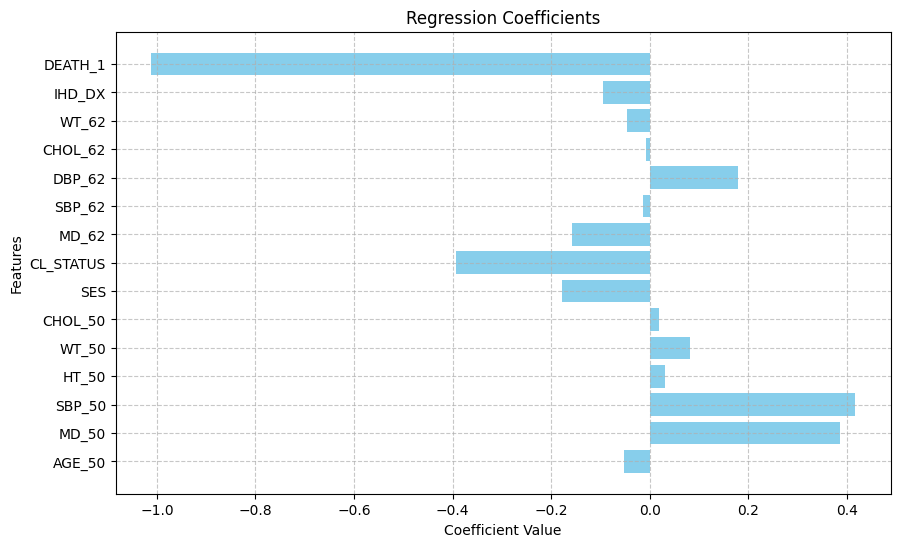

In [ ]:
# L2-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l2')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)

Regularization: None
Mean Absolute Error (MAE): 4.34
Mean Squared Error (MSE): 25.77
R^2 Score: 0.58


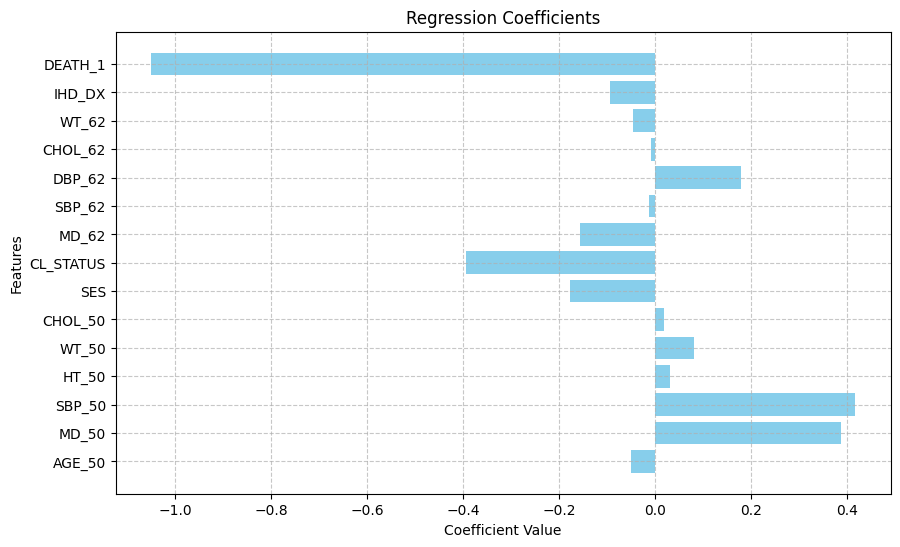

In [ ]:
# Без регуляризации
model, _, _, _, _  = resolve_regression(X, y, regularization=None)
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)


In [ ]:
X

,AGE_50,MD_50,SBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH_1
0,42,1,110.0,64.0,147.0,291.0,2,8,4,120.0,78.0,271.0,146.0,2,True
1,53,1,130.0,69.0,167.0,278.0,1,6,2,122.0,68.0,250.0,165.0,9,True
2,53,2,120.0,70.0,222.0,342.0,4,8,1,132.0,90.0,304.0,223.0,2,True
3,48,4,120.0,72.0,229.0,239.0,4,8,2,118.0,68.0,209.0,227.0,3,True
4,53,3,118.0,66.0,134.0,243.0,3,8,5,118.0,56.0,261.0,138.0,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115.0,66.0,148.0,300.0,2,8,1,115.0,65.0,273.0,152.0,0,False
196,23,1,110.0,69.0,137.0,120.0,3,8,2,112.0,76.0,198.0,153.0,0,False
197,20,3,130.0,66.0,150.0,210.0,5,0,1,130.0,85.0,274.0,158.0,0,False
198,46,3,140.0,66.0,138.0,130.0,4,6,2,148.0,88.0,160.0,157.0,0,False


In [ ]:
X_selected_rfe


,MD_50,SBP_50,CL_STATUS,DBP_62,DEATH_1
0,1,110.0,8,78.0,True
1,1,130.0,6,68.0,True
2,2,120.0,8,90.0,True
3,4,120.0,8,68.0,True
4,3,118.0,8,56.0,True
...,...,...,...,...,...
195,1,115.0,8,65.0,False
196,1,110.0,8,76.0,False
197,3,130.0,0,85.0,False
198,3,140.0,6,88.0,False


In [ ]:
y_selected_rfe

,DBP_50
0,65.0
1,72.0
2,90.0
3,80.0
4,74.0
...,...
195,80.0
196,70.0
197,80.0
198,84.0


### Модель KNeighborsRegressor

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

def train_and_evaluate_knn(X, y, k=5, test_size=0.2, random_state=42):
    """
    Обучает модель KNeighborsRegressor и оценивает её производительность.

    Параметры:
    X : DataFrame
        Признаки (входные данные).
    y : Series
        Целевая переменная (выходные данные).
    k : int, optional
        Число ближайших соседей (по умолчанию 5).
    test_size : float, optional
        Доля тестовой выборки (по умолчанию 0.2).
    random_state : int, optional
        Случайное состояние для воспроизводимости (по умолчанию 42).

    Возвращает:
    tuple
        Средняя квадратичная ошибка (MSE) и коэффициент детерминации (R^2) модели.
    """
    # Разделяем данные на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Нормализуем числовые признаки
    numeric_features = X_train.select_dtypes(include=['float64', 'int']).columns.tolist()
    scaler = MinMaxScaler()
    X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
    X_test[numeric_features] = scaler.transform(X_test[numeric_features])

    # Инициализируем и обучаем модель
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Делаем предсказания
    y_pred = knn.predict(X_test)

    # Оценка модели
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mae, mse, r2  # Возвращаем значения MSE и R^2


# Вы можете вызвать функцию следующим образом:
mea, mse, r2 = train_and_evaluate_knn(X, y, k=7)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Absolute Error (MAE): 5.50
Mean Squared Error: 44.75408163265306
R^2 Score: 0.2675273055212265


* MAE 5.50 означает, что в среднем предсказания модели отклоняются от фактических значений на 5.50 единиц. Это относительно высокая ошибка, что может указывать на то, что модель не очень точно предсказывает значения.
* MSE 44.75 показывает, что среднее квадратичное отклонение предсказаний от фактических значений достаточно велико. MSE  больше, чем MAE, что может указывать на наличие нескольких значительных ошибок в предсказаниях модели. Это также говорит о том, что модель может быть чувствительна к выбросам в данных.
* Значение R² Score 0.268 показывает, что модель объясняет 26.8% вариации зависимой переменной.  Это довольно низкое значение, что говорит о том, что модель не очень хорошо подходит для данных и не может эффективно объяснить, как независимые переменные влияют на зависимую переменную.

Влияние k:

Значение k может значительно влиять на производительность модели. Малые значения k могут привести к переобучению (модель слишком чувствительна к шуму в данных), в то время как большие значения могут привести к недообучению (модель игнорирует важные детали).

### Модель DecisionTreeRegressor

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация и обучение модели
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error (MAE): 5.50
Mean Squared Error: 42.670236827609955
R^2 Score: 0.30163278514549996


DecisionTreeRegressor строит модель в виде дерева решений, где каждый узел представляет собой проверку (условие) на одном из признаков, а ветви представляют собой результаты проверки. Листовые узлы дерева содержат предсказанные значения целевой переменной.

Значение MAE 5.5 указывает на то, что в среднем предсказания модели отклоняются от фактических значений на 5.50 единиц.

MSE составляет 42.67, что немного ниже, чем в предыдущем примере (44.75). Это указывает на то, что, хотя модель все еще может делать ошибки, среднее квадратичное отклонение предсказаний стало немного меньше, что может свидетельствовать о том, что модель лучше справляется с некоторыми случаями.

Значение R² Score 0.302 говорит о том, что модель объясняет 30.2% вариации зависимой переменной. Это улучшение по сравнению с предыдущими результатами (26.8%), что указывает на то, что DecisionTreeRegressor лучше справляется с задачей, чем предыдущие модели.